In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\rathi\course8-Renaissa\graphene_synthesis_dataset.csv')
data

,route_family,variant,substrate,transfer_required,process_temp_c,pressure_torr,h2_flow_sccm,ch4_flow_sccm,anneal_minutes,monolayer_fraction,...,layer_count_avg,defect_density_cm2,sheet_res_ohm_sq,batch_energy_kwh,duration_hours,safety_risk_score,scalability_score,estimated_cost_usd,device_grade,quality_band
0,Mechanical Exfoliation,Scotch Tape,SiO2/Si,0,22.7,760.00,0.0,0.0,0,0.946,...,1.18,10677433207,324.2,0.58,0.55,0.09,0.20,61.92,1,High
1,Mechanical Exfoliation,Diamond Wedge,SiO2/Si,0,22.8,760.00,0.0,0.0,0,0.819,...,1.05,7149198933,301.9,0.14,1.51,0.26,0.21,110.32,1,High
2,Mechanical Exfoliation,Liquid-Phase Sonication,SiO2/Si,0,21.8,760.00,0.0,0.0,0,0.651,...,1.74,13288865370,560.3,0.38,0.89,0.17,0.30,81.53,1,Medium
3,CVD,Ni polycrystalline,Ni poly,1,1005.7,1.85,69.8,26.3,12,0.511,...,2.02,55318654488,1800.2,12.23,2.40,0.66,0.67,363.33,0,Low
4,CVD,Ni(111) single crystal,Ni(111),1,967.5,0.99,35.8,30.2,16,0.727,...,2.89,53980249138,1366.4,13.58,4.49,0.60,0.53,556.68,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CVD,Ni(111) single crystal,Ni(111),1,1001.8,2.29,59.2,11.3,12,0.586,...,2.86,60614123147,1794.0,16.14,3.27,0.78,0.73,554.66,0,Low
68,CVD,Cu foil,Cu poly,1,946.6,0.97,47.6,30.5,15,0.787,...,1.87,28748325392,829.4,11.55,3.82,0.70,0.81,410.12,1,Medium
69,CVD,Fe foil,Fe,1,952.2,1.29,59.9,21.4,10,0.706,...,2.06,53903325911,1292.6,17.69,2.76,0.68,0.82,430.19,0,Low
70,Modified Hummers,KMnO4 + H2SO4 (NaNO3-free),NaN,0,26.8,760.00,0.0,0.0,0,0.348,...,2.50,73805501730,2680.2,3.33,10.81,0.54,0.66,482.64,0,Low


In [3]:
data.isnull().sum()

route_family           0
variant                0
substrate             16
transfer_required      0
process_temp_c         0
pressure_torr          0
h2_flow_sccm           0
ch4_flow_sccm          0
anneal_minutes         0
monolayer_fraction     0
domain_size_um         0
layer_count_avg        0
defect_density_cm2     0
sheet_res_ohm_sq       0
batch_energy_kwh       0
duration_hours         0
safety_risk_score      0
scalability_score      0
estimated_cost_usd     0
device_grade           0
quality_band           0
dtype: int64

In [4]:
substrate_mode = data["substrate"].mode()[0]
data["substrate"] = data["substrate"].fillna(substrate_mode)
data

,route_family,variant,substrate,transfer_required,process_temp_c,pressure_torr,h2_flow_sccm,ch4_flow_sccm,anneal_minutes,monolayer_fraction,...,layer_count_avg,defect_density_cm2,sheet_res_ohm_sq,batch_energy_kwh,duration_hours,safety_risk_score,scalability_score,estimated_cost_usd,device_grade,quality_band
0,Mechanical Exfoliation,Scotch Tape,SiO2/Si,0,22.7,760.00,0.0,0.0,0,0.946,...,1.18,10677433207,324.2,0.58,0.55,0.09,0.20,61.92,1,High
1,Mechanical Exfoliation,Diamond Wedge,SiO2/Si,0,22.8,760.00,0.0,0.0,0,0.819,...,1.05,7149198933,301.9,0.14,1.51,0.26,0.21,110.32,1,High
2,Mechanical Exfoliation,Liquid-Phase Sonication,SiO2/Si,0,21.8,760.00,0.0,0.0,0,0.651,...,1.74,13288865370,560.3,0.38,0.89,0.17,0.30,81.53,1,Medium
3,CVD,Ni polycrystalline,Ni poly,1,1005.7,1.85,69.8,26.3,12,0.511,...,2.02,55318654488,1800.2,12.23,2.40,0.66,0.67,363.33,0,Low
4,CVD,Ni(111) single crystal,Ni(111),1,967.5,0.99,35.8,30.2,16,0.727,...,2.89,53980249138,1366.4,13.58,4.49,0.60,0.53,556.68,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CVD,Ni(111) single crystal,Ni(111),1,1001.8,2.29,59.2,11.3,12,0.586,...,2.86,60614123147,1794.0,16.14,3.27,0.78,0.73,554.66,0,Low
68,CVD,Cu foil,Cu poly,1,946.6,0.97,47.6,30.5,15,0.787,...,1.87,28748325392,829.4,11.55,3.82,0.70,0.81,410.12,1,Medium
69,CVD,Fe foil,Fe,1,952.2,1.29,59.9,21.4,10,0.706,...,2.06,53903325911,1292.6,17.69,2.76,0.68,0.82,430.19,0,Low
70,Modified Hummers,KMnO4 + H2SO4 (NaNO3-free),SiO2/Si,0,26.8,760.00,0.0,0.0,0,0.348,...,2.50,73805501730,2680.2,3.33,10.81,0.54,0.66,482.64,0,Low


In [5]:
data.columns

Index(['route_family', 'variant', 'substrate', 'transfer_required',
       'process_temp_c', 'pressure_torr', 'h2_flow_sccm', 'ch4_flow_sccm',
       'anneal_minutes', 'monolayer_fraction', 'domain_size_um',
       'layer_count_avg', 'defect_density_cm2', 'sheet_res_ohm_sq',
       'batch_energy_kwh', 'duration_hours', 'safety_risk_score',
       'scalability_score', 'estimated_cost_usd', 'device_grade',
       'quality_band'],
      dtype='object')

In [6]:
data.dtypes

route_family           object
variant                object
substrate              object
transfer_required       int64
process_temp_c        float64
pressure_torr         float64
h2_flow_sccm          float64
ch4_flow_sccm         float64
anneal_minutes          int64
monolayer_fraction    float64
domain_size_um        float64
layer_count_avg       float64
defect_density_cm2      int64
sheet_res_ohm_sq      float64
batch_energy_kwh      float64
duration_hours        float64
safety_risk_score     float64
scalability_score     float64
estimated_cost_usd    float64
device_grade            int64
quality_band           object
dtype: object

In [7]:
for i in data.columns:
    print(data[i].unique())

['Mechanical Exfoliation' 'CVD' 'Modified Hummers' 'Improved Hummers']
['Scotch Tape' 'Diamond Wedge' 'Liquid-Phase Sonication'
 'Ni polycrystalline' 'Ni(111) single crystal' 'Cu foil' 'Fe foil'
 'KMnO4 + H2SO4 (NaNO3-free)' 'K2FeO4 + reduced H2SO4']
['SiO2/Si' 'Ni poly' 'Ni(111)' 'Cu poly' 'Fe']
[0 1]
[  22.7   22.8   21.8 1005.7  967.5  983.4  993.8   19.3   29.3   21.7
   25.9   23.  1000.6  979.5 1008.9 1014.4   25.7   29.4   19.1   21.3
  940.5  967.1 1010.9  960.3   28.8   25.1   22.   989.1  974.2  960.4
  963.8   20.7   27.2   21.9   24.1  975.2  943.4  943.2  981.5   20.3
   22.5   21.2   19.    24.   941.9  971.4  976.   969.2   26.1   22.3
   18.9   21.6  965.5  941.4  908.9  926.6   26.    29.1   25.6  982.2
 1001.8  946.6  952.2   26.8]
[7.60e+02 1.85e+00 9.90e-01 1.29e+00 1.26e+00 1.13e+00 2.23e+00 8.70e-01
 1.42e+00 1.70e+00 1.01e+00 7.50e-01 1.15e+00 2.07e+00 1.18e+00 1.10e+00
 1.04e+00 1.92e+00 1.38e+00 1.64e+00 1.32e+00 1.87e+00 1.71e+00 1.24e+00
 1.46e+00 1.62e+00 2.

In [8]:
# Create a copy of the numeric data to avoid modifying the original
no_outlier = data.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

# Apply outlier cleanup to specific columns
my_conti_cols = ['process_temp_c', 'pressure_torr', 'h2_flow_sccm', 'ch4_flow_sccm', 'anneal_minutes', 'monolayer_fraction', 'domain_size_um',
       'layer_count_avg', 'defect_density_cm2', 'sheet_res_ohm_sq', 'batch_energy_kwh', 'duration_hours', 'safety_risk_score','scalability_score', 
       'estimated_cost_usd']
for col in my_conti_cols:
    outlier_cleanup(col)

no_outlier

,route_family,variant,substrate,transfer_required,process_temp_c,pressure_torr,h2_flow_sccm,ch4_flow_sccm,anneal_minutes,monolayer_fraction,...,layer_count_avg,defect_density_cm2,sheet_res_ohm_sq,batch_energy_kwh,duration_hours,safety_risk_score,scalability_score,estimated_cost_usd,device_grade,quality_band
0,Mechanical Exfoliation,Scotch Tape,SiO2/Si,0,22.7,760.00,0.0,0.0,0,0.946,...,1.18,10677433207,324.2,0.58,0.55000,0.09,0.20,61.92,1,High
1,Mechanical Exfoliation,Diamond Wedge,SiO2/Si,0,22.8,760.00,0.0,0.0,0,0.819,...,1.05,7149198933,301.9,0.14,1.51000,0.26,0.21,110.32,1,High
2,Mechanical Exfoliation,Liquid-Phase Sonication,SiO2/Si,0,21.8,760.00,0.0,0.0,0,0.651,...,1.74,13288865370,560.3,0.38,0.89000,0.17,0.30,81.53,1,Medium
3,CVD,Ni polycrystalline,Ni poly,1,1005.7,1.85,69.8,26.3,12,0.511,...,2.02,55318654488,1800.2,12.23,2.40000,0.66,0.67,363.33,0,Low
4,CVD,Ni(111) single crystal,Ni(111),1,967.5,0.99,35.8,30.2,16,0.727,...,2.89,53980249138,1366.4,13.58,4.49000,0.60,0.53,556.68,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CVD,Ni(111) single crystal,Ni(111),1,1001.8,2.29,59.2,11.3,12,0.586,...,2.86,60614123147,1794.0,16.14,3.27000,0.78,0.73,554.66,0,Low
68,CVD,Cu foil,Cu poly,1,946.6,0.97,47.6,30.5,15,0.787,...,1.87,28748325392,829.4,11.55,3.82000,0.70,0.81,410.12,1,Medium
69,CVD,Fe foil,Fe,1,952.2,1.29,59.9,21.4,10,0.706,...,2.06,53903325911,1292.6,17.69,2.76000,0.68,0.82,430.19,0,Low
70,Modified Hummers,KMnO4 + H2SO4 (NaNO3-free),SiO2/Si,0,26.8,760.00,0.0,0.0,0,0.348,...,2.50,73805501730,2680.2,3.33,9.21875,0.54,0.66,482.64,0,Low


In [9]:
# Label Encoding in categorical columns
from sklearn import preprocessing

categ = data.select_dtypes(exclude="number")

for i in categ.columns:
    encoder = preprocessing.LabelEncoder()  # Encoder is the object of 'LabelEncoder'.
    no_outlier[i] = encoder.fit_transform(no_outlier[i])

no_outlier

,route_family,variant,substrate,transfer_required,process_temp_c,pressure_torr,h2_flow_sccm,ch4_flow_sccm,anneal_minutes,monolayer_fraction,...,layer_count_avg,defect_density_cm2,sheet_res_ohm_sq,batch_energy_kwh,duration_hours,safety_risk_score,scalability_score,estimated_cost_usd,device_grade,quality_band
0,2,8,4,0,22.7,760.00,0.0,0.0,0,0.946,...,1.18,10677433207,324.2,0.58,0.55000,0.09,0.20,61.92,1,0
1,2,1,4,0,22.8,760.00,0.0,0.0,0,0.819,...,1.05,7149198933,301.9,0.14,1.51000,0.26,0.21,110.32,1,0
2,2,5,4,0,21.8,760.00,0.0,0.0,0,0.651,...,1.74,13288865370,560.3,0.38,0.89000,0.17,0.30,81.53,1,2
3,0,6,2,1,1005.7,1.85,69.8,26.3,12,0.511,...,2.02,55318654488,1800.2,12.23,2.40000,0.66,0.67,363.33,0,1
4,0,7,3,1,967.5,0.99,35.8,30.2,16,0.727,...,2.89,53980249138,1366.4,13.58,4.49000,0.60,0.53,556.68,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,7,3,1,1001.8,2.29,59.2,11.3,12,0.586,...,2.86,60614123147,1794.0,16.14,3.27000,0.78,0.73,554.66,0,1
68,0,0,0,1,946.6,0.97,47.6,30.5,15,0.787,...,1.87,28748325392,829.4,11.55,3.82000,0.70,0.81,410.12,1,2
69,0,2,1,1,952.2,1.29,59.9,21.4,10,0.706,...,2.06,53903325911,1292.6,17.69,2.76000,0.68,0.82,430.19,0,1
70,3,4,4,0,26.8,760.00,0.0,0.0,0,0.348,...,2.50,73805501730,2680.2,3.33,9.21875,0.54,0.66,482.64,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

def my_scaling(col):
    my_scaling_obj = MinMaxScaler()
    no_outlier[col] = pd.DataFrame(my_scaling_obj.fit_transform(no_outlier[col].to_numpy().reshape(-1,1)))
    return no_outlier[col]
my_numerical_cols = ['process_temp_c', 'pressure_torr', 'h2_flow_sccm', 'ch4_flow_sccm', 'anneal_minutes', 'monolayer_fraction', 'domain_size_um',
       'layer_count_avg', 'defect_density_cm2', 'sheet_res_ohm_sq', 'batch_energy_kwh', 'duration_hours', 'safety_risk_score','scalability_score', 
       'estimated_cost_usd']
for i in my_numerical_cols:
    no_outlier[i] = my_scaling(i)
no_outlier

,route_family,variant,substrate,transfer_required,process_temp_c,pressure_torr,h2_flow_sccm,ch4_flow_sccm,anneal_minutes,monolayer_fraction,...,layer_count_avg,defect_density_cm2,sheet_res_ohm_sq,batch_energy_kwh,duration_hours,safety_risk_score,scalability_score,estimated_cost_usd,device_grade,quality_band
0,2,8,4,0,0.003817,1.000000,0.000000,0.000000,0.00,0.953488,...,0.064748,0.042653,0.006040,0.021749,0.006874,0.047059,0.1000,0.000000,1,0
1,2,1,4,0,0.003918,1.000000,0.000000,0.000000,0.00,0.779754,...,0.017986,0.000000,0.000000,0.001812,0.116855,0.247059,0.1125,0.087410,1,0
2,2,5,4,0,0.002913,1.000000,0.000000,0.000000,0.00,0.549932,...,0.266187,0.074223,0.069993,0.012687,0.045826,0.141176,0.2250,0.035416,1,2
3,0,6,2,1,0.991261,0.001449,0.841978,0.635266,0.48,0.358413,...,0.366906,0.582321,0.405845,0.549615,0.218817,0.717647,0.6875,0.544346,0,1
4,0,7,3,1,0.952888,0.000316,0.431846,0.729469,0.64,0.653899,...,0.679856,0.566141,0.288342,0.610784,0.458256,0.647059,0.5125,0.893536,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,7,3,1,0.987343,0.002028,0.714113,0.272947,0.48,0.461012,...,0.669065,0.646338,0.404166,0.726778,0.318488,0.858824,0.7625,0.889888,0,1
68,0,0,0,1,0.931894,0.000290,0.574186,0.736715,0.60,0.735978,...,0.312950,0.261112,0.142884,0.518804,0.381498,0.764706,0.8625,0.628849,1,2
69,0,2,1,1,0.937519,0.000711,0.722557,0.516908,0.40,0.625171,...,0.381295,0.565211,0.268351,0.797010,0.260060,0.741176,0.8750,0.665095,0,1
70,3,4,4,0,0.007936,1.000000,0.000000,0.000000,0.00,0.135431,...,0.539568,0.805809,0.644211,0.146353,1.000000,0.576471,0.6750,0.759820,0,1


# Multiple Linear Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + c + e (Multiple Linear Regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
my_corr = no_outlier.corr()[['estimated_cost_usd']].sort_values(by='estimated_cost_usd', ascending=False)
my_corr

,estimated_cost_usd
estimated_cost_usd,1.000000
safety_risk_score,0.907365
defect_density_cm2,0.889983
scalability_score,0.889168
sheet_res_ohm_sq,0.776674
layer_count_avg,0.729444
batch_energy_kwh,0.711227
duration_hours,0.663983
process_temp_c,0.585230
transfer_required,0.584860


In [14]:
# Check multi-colinearity between independent variables using the VIF score.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
no_cost = no_outlier.drop("estimated_cost_usd", axis=1)
no_cost

,route_family,variant,substrate,transfer_required,process_temp_c,pressure_torr,h2_flow_sccm,ch4_flow_sccm,anneal_minutes,monolayer_fraction,domain_size_um,layer_count_avg,defect_density_cm2,sheet_res_ohm_sq,batch_energy_kwh,duration_hours,safety_risk_score,scalability_score,device_grade,quality_band
0,2,8,4,0,0.003817,1.000000,0.000000,0.000000,0.00,0.953488,0.048134,0.064748,0.042653,0.006040,0.021749,0.006874,0.047059,0.1000,1,0
1,2,1,4,0,0.003918,1.000000,0.000000,0.000000,0.00,0.779754,0.028974,0.017986,0.000000,0.000000,0.001812,0.116855,0.247059,0.1125,1,0
2,2,5,4,0,0.002913,1.000000,0.000000,0.000000,0.00,0.549932,0.027572,0.266187,0.074223,0.069993,0.012687,0.045826,0.141176,0.2250,1,2
3,0,6,2,1,0.991261,0.001449,0.841978,0.635266,0.48,0.358413,0.509843,0.366906,0.582321,0.405845,0.549615,0.218817,0.717647,0.6875,0,1
4,0,7,3,1,0.952888,0.000316,0.431846,0.729469,0.64,0.653899,0.624336,0.679856,0.566141,0.288342,0.610784,0.458256,0.647059,0.5125,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,7,3,1,0.987343,0.002028,0.714113,0.272947,0.48,0.461012,0.321981,0.669065,0.646338,0.404166,0.726778,0.318488,0.858824,0.7625,0,1
68,0,0,0,1,0.931894,0.000290,0.574186,0.736715,0.60,0.735978,0.985104,0.312950,0.261112,0.142884,0.518804,0.381498,0.764706,0.8625,1,2
69,0,2,1,1,0.937519,0.000711,0.722557,0.516908,0.40,0.625171,0.887902,0.381295,0.565211,0.268351,0.797010,0.260060,0.741176,0.8750,0,1
70,3,4,4,0,0.007936,1.000000,0.000000,0.000000,0.00,0.135431,0.066359,0.539568,0.805809,0.644211,0.146353,1.000000,0.576471,0.6750,0,1


In [17]:
no_of_cols = no_cost.shape[1]
no_of_cols

20

In [18]:
def myVIF(x):
    vif = pd.Series(name="vif")
    for i in range(0, no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif

vif_values = myVIF(no_cost)
print(vif_values)

route_family            25.846949
variant                  9.740567
substrate               87.944824
transfer_required     2472.717905
process_temp_c        1964.036138
pressure_torr          205.958019
h2_flow_sccm            49.093219
ch4_flow_sccm           21.144065
anneal_minutes          16.227047
monolayer_fraction     123.002747
domain_size_um          11.884342
layer_count_avg         15.289175
defect_density_cm2     111.228049
sheet_res_ohm_sq        90.006293
batch_energy_kwh        47.560000
duration_hours          45.275481
safety_risk_score       45.162042
scalability_score       65.363745
device_grade            42.395457
quality_band             7.830837
Name: vif, dtype: float64


In [19]:
# We should take the columns in which VIF scores are less than 20.
# We are taking 4 independent columns: 'layer_count_avg', 'anneal_minutes', 'quality_band', and 'domain_size_um' (based on correlation with the target column and VIF score).

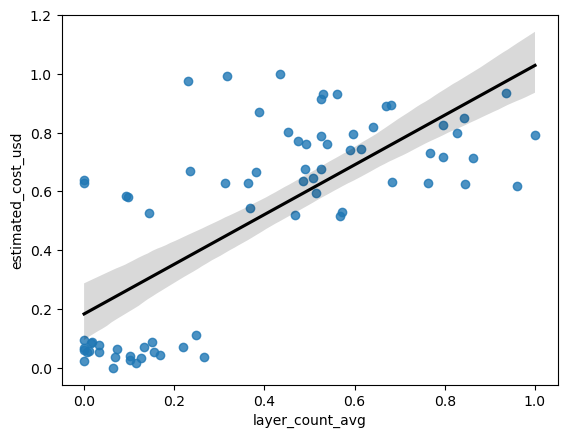

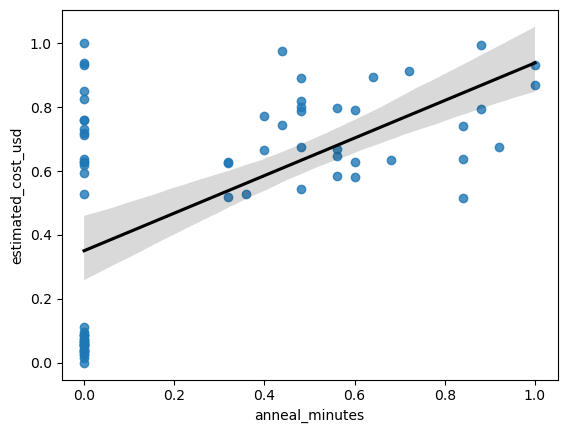

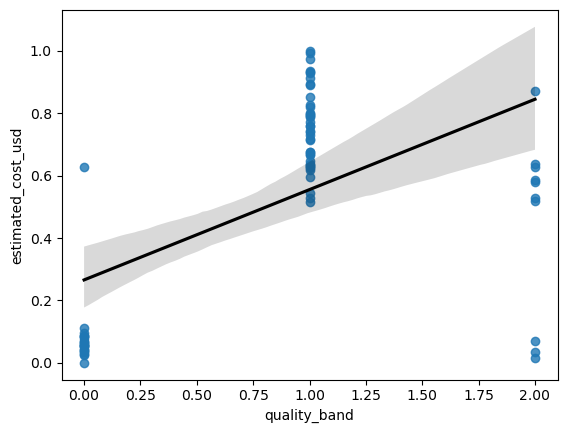

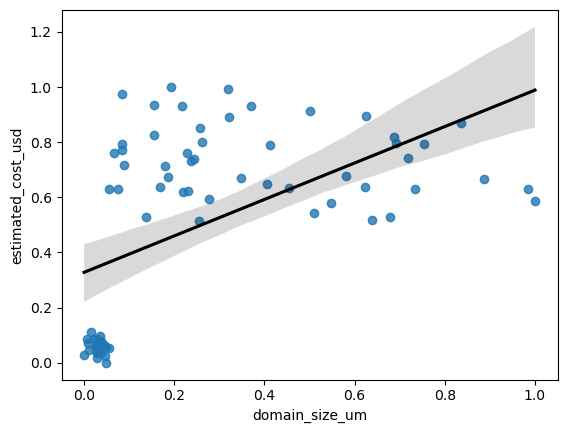

In [20]:
my_cols = ['layer_count_avg', 'anneal_minutes', 'quality_band', 'domain_size_um']
for i in my_cols:
    sns.regplot(x=i, y="estimated_cost_usd", data=no_outlier, line_kws={"color":"black"})
    plt.show()

In [21]:
x_new = no_outlier[['layer_count_avg', 'anneal_minutes', 'quality_band', 'domain_size_um']].to_numpy().reshape(-1,4)  # 2-D array with 54 samples
x_new

array([[0.0647482 , 0.        , 0.        , 0.04813365],
       [0.01798561, 0.        , 0.        , 0.02897366],
       [0.26618705, 0.        , 2.        , 0.0275717 ],
       [0.36690647, 0.48      , 1.        , 0.50984286],
       [0.67985612, 0.64      , 1.        , 0.62433553],
       [0.        , 0.32      , 0.        , 0.73462235],
       [0.58992806, 0.84      , 1.        , 0.24300485],
       [0.76258993, 0.        , 1.        , 0.05607804],
       [0.49280576, 0.        , 1.        , 0.2280507 ],
       [0.        , 0.        , 0.        , 0.04719902],
       [0.        , 0.        , 0.        , 0.03177756],
       [0.07194245, 0.        , 0.        , 0.02570244],
       [0.50719424, 0.56      , 1.        , 0.40516385],
       [0.47482014, 0.4       , 1.        , 0.08411706],
       [0.09352518, 0.56      , 2.        , 1.        ],
       [0.84532374, 0.32      , 1.        , 0.22945265],
       [0.56115108, 0.        , 1.        , 0.2168351 ],
       [0.36330935, 0.        ,

In [22]:
y_new = no_outlier["estimated_cost_usd"].to_numpy().reshape(-1, 1)  # 2-D array with 72 samples
y_new

array([[0.        ],
       [0.08741038],
       [0.03541565],
       [0.54434632],
       [0.89353633],
       [0.62863232],
       [0.73991801],
       [0.6293186 ],
       [0.76028968],
       [0.02355023],
       [0.06160264],
       [0.06449224],
       [0.64707157],
       [0.77163136],
       [0.58548699],
       [0.62446046],
       [0.93023424],
       [0.62856008],
       [0.05479403],
       [0.05445089],
       [0.03810659],
       [0.79402575],
       [0.80139423],
       [0.86976937],
       [0.51595601],
       [0.8509328 ],
       [0.71371295],
       [0.06618988],
       [0.07052428],
       [0.11150241],
       [0.66971881],
       [0.93176934],
       [0.57983421],
       [0.79731267],
       [1.        ],
       [0.73029203],
       [0.08583916],
       [0.0867241 ],
       [0.02797493],
       [0.67591338],
       [0.99364288],
       [0.51936934],
       [0.81959871],
       [0.71855303],
       [0.6187535 ],
       [0.0787777 ],
       [0.03442235],
       [0.045

In [23]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, train_size = 0.7, random_state = 0)

In [24]:
# 'multi' is the name of the trained model.

In [25]:
model = LinearRegression()  # Step 1: Build a model using an algorithm.
multi = model.fit(x_new_train, y_new_train)  # Step 2: Fit the model. # Here, we are building the model and training it in the same line.

In [26]:
# Step 3: Check training performance of the model.
r_square = multi.score(x_new_train, y_new_train)
print("R-square:", r_square)  # Training model performance is 74.5%, which is good. A bad model will not give good results.

R-square: 0.744726545710819


In [27]:
# Step 4: Predict through unseen data using predict().
y_new_pred = multi.predict(x_new_test)  # We are predicting the values of y_test and storing it as 'y_prediction'. The input is given by passing the input as x_test -> if not matching, it is an error or residual (for numerical columns).
y_new_pred  # This is predicting and comparing with 'y_new_test' values.

array([[0.73468327],
       [0.07328127],
       [0.68809549],
       [0.62275561],
       [0.5163419 ],
       [0.85384677],
       [0.65438334],
       [0.5731634 ],
       [0.461603  ],
       [0.54245857],
       [0.15773104],
       [0.38938486],
       [0.83748211],
       [0.79713591],
       [0.94135583],
       [0.09180352],
       [0.51248609],
       [0.49077984],
       [0.6792867 ],
       [0.86139893],
       [0.32490462],
       [0.53199524]])

In [28]:
mse = mean_squared_error(y_new_test, y_new_pred)
print("MSE:", mse)  # Smaller errors are better. Example: 2 is better than 2000 errors in case of MSE. MSE is numerical, not %, all errors are %.

MSE: 0.033216556317596575


In [29]:
# Step 5: Check testing (r_square) performance of the model. -> Checks the reliability of the model.
r2_new = r2_score(y_new_test, y_new_pred)
print("New R-squared:", r2_new)  # The model performance is 64.6%, which is moderately good.

New R-squared: 0.6465226736942884


In [30]:
# Linear regression works better when there is more than one input column.

In [31]:
multi.intercept_  # The linear regression model gives the intercept value.

array([0.06773507])

In [32]:
multi.coef_  # Since we have taken 4 independent variables, we get 4 slopes for each line of best fit.

array([[0.6421318 , 0.29316171, 0.08980863, 0.12761488]])

In [33]:
# Create a table containing residuals.
df_residual = pd.DataFrame()  # Creating an empty DataFrame
df_residual["y_pred"] = pd.DataFrame(y_new_pred)  # 'y_pred' - Creating a new column
# Assigning all 'y_new_pred' values to a 'y_pred' column in a DataFrame

In [34]:
df_residual["y_actual"] = pd.DataFrame(y_new_test)

In [35]:
# Residual = |Predicted - Actual|
df_residual["Residual"] = abs(df_residual["y_pred"] - df_residual["y_actual"])  # Error is calculated for each row.
df_residual  # Table with actual, predicted, and residual values

,y_pred,y_actual,Residual
0,0.734683,0.713713,0.020970
1,0.073281,0.066190,0.007091
2,0.688095,0.789041,0.100946
3,0.622756,0.801394,0.178639
4,0.516342,0.669719,0.153377
5,0.853847,0.633364,0.220483
6,0.654383,0.629319,0.025065
7,0.573163,0.638005,0.064842
8,0.461603,1.000000,0.538397
9,0.542459,0.528345,0.014113


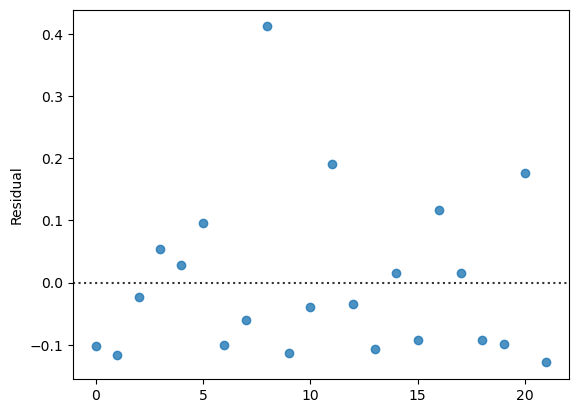

In [36]:
# Check if the assumption 'Homascedasticity' is applicable for this model.
sns.residplot(x = df_residual.index, y = "Residual", data = df_residual);

In [37]:
# According to the 'Residual' visual, homoscedasticity is followed.

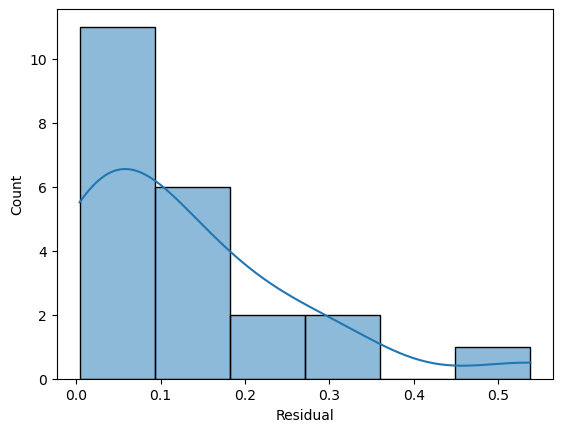

In [38]:
# Assumption normality of residuals
sns.histplot(df_residual["Residual"], kde=True);

In [39]:
# This assumption fails because errors are not normally distributed.

# Logistic Regression

In [41]:
len(no_outlier)

72

In [42]:
# Target column = 'estimated_cost_usd' is to be predicted. So, it will be considered as a dependent column.
# All other columns except for the column 'estimated_cost_usd' will be independent.

In [43]:
# We split the table into 4 parts that are called:
# x_train (training independent)
# x_test (testing independent)
# y_train (training dependent)
# y_test (testing dependent)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve

In [45]:
data['estimated_cost_usd'].unique()

array([ 61.92, 110.32,  81.53, 363.33, 556.68, 410.  , 471.62, 410.38,
       482.9 ,  74.96,  96.03,  97.63, 420.21, 489.18, 386.11, 407.69,
       577.  , 409.96,  92.26,  92.07,  83.02, 501.58, 505.66, 543.52,
       347.61, 533.09, 457.11,  98.57, 100.97, 123.66, 432.75, 577.85,
       382.98, 503.4 , 615.63, 466.29, 109.45, 109.94,  77.41, 436.18,
       612.11, 349.5 , 515.74, 459.79, 404.53, 105.54,  80.98,  86.89,
       498.82, 567.96, 354.23, 412.62, 519.49, 391.09,  83.77,  92.5 ,
       100.79, 500.4 , 601.57, 415.19, 474.04, 580.47, 414.18,  93.35,
       115.13,  70.79, 435.72, 554.66, 410.12, 430.19, 482.64, 354.47])

In [46]:
no_outlier['estimated_cost_usd'].unique()

array([0.        , 0.08741038, 0.03541565, 0.54434632, 0.89353633,
       0.62863232, 0.73991801, 0.6293186 , 0.76028968, 0.02355023,
       0.06160264, 0.06449224, 0.64707157, 0.77163136, 0.58548699,
       0.62446046, 0.93023424, 0.62856008, 0.05479403, 0.05445089,
       0.03810659, 0.79402575, 0.80139423, 0.86976937, 0.51595601,
       0.8509328 , 0.71371295, 0.06618988, 0.07052428, 0.11150241,
       0.66971881, 0.93176934, 0.57983421, 0.79731267, 1.        ,
       0.73029203, 0.08583916, 0.0867241 , 0.02797493, 0.67591338,
       0.99364288, 0.51936934, 0.81959871, 0.71855303, 0.6187535 ,
       0.0787777 , 0.03442235, 0.04509581, 0.78904119, 0.913908  ,
       0.52791172, 0.63336404, 0.82637121, 0.59448087, 0.03946109,
       0.05522747, 0.0701992 , 0.79189467, 0.97460765, 0.63800545,
       0.74428853, 0.93650106, 0.63618139, 0.05676257, 0.09609724,
       0.01601922, 0.67508262, 0.88988821, 0.62884904, 0.66509545,
       0.75982012, 0.52834516])

Accuracy : 0.9545454545454546
F1 Score : 0.9230769230769231
ROC-AUC  : 1.0

Confusion Matrix:
 [[15  1]
 [ 0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.86      1.00      0.92         6

    accuracy                           0.95        22
   macro avg       0.93      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22



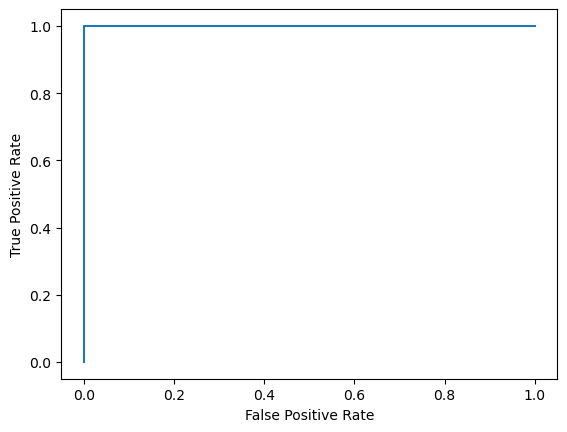

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


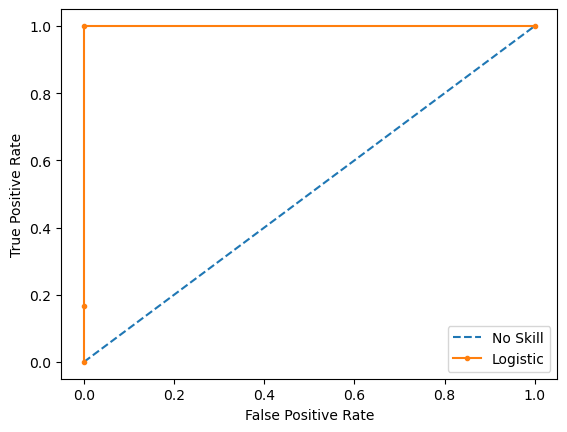

In [187]:
# Logistic Regression
# 1. Feature set
features = ['route_family', 'variant', 'substrate', 'transfer_required',
       'process_temp_c', 'pressure_torr', 'h2_flow_sccm', 'ch4_flow_sccm',
       'anneal_minutes', 'monolayer_fraction', 'domain_size_um',
       'layer_count_avg', 'defect_density_cm2', 'sheet_res_ohm_sq',
       'safety_risk_score', 'scalability_score', 'estimated_cost_usd']  
       # affect the final quality classification of a synthesized graphene device and give a complete representation of both the process and the quality 
       # of the resulting material, making them the most important predictors of the graphene device's grade
x = no_outlier[features]
y = no_outlier['device_grade']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# 3. Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# 4. Predict on test set
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)

# 5. Evaluation metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob[:,1], pos_label = 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]  # We are using list comprehension.

# 6. ROC curve
lr_probs = lr_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()

# K-Nearest Neighbors

In [171]:
# Features: ["monolayer_fraction", "domain_size_um", "defect_density_cm2", "sheet_res_ohm_sq", "layer_count_avg"]
# They describe graphene quality and synthesis outcomes, meaning that clusters correspond to high-quality CVD, medium LPE graphene,
# and low-quality exfoliation routes.

72
8
0.96
[1 0 1 1 1 1 1 2 1 1 0 0 1 1 1 0 1 1 1 1 0 2]
[0 1 2]
8
7
[0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.6818181818181818, 0.6818181818181818]
[ 4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]
0.9090909090909091


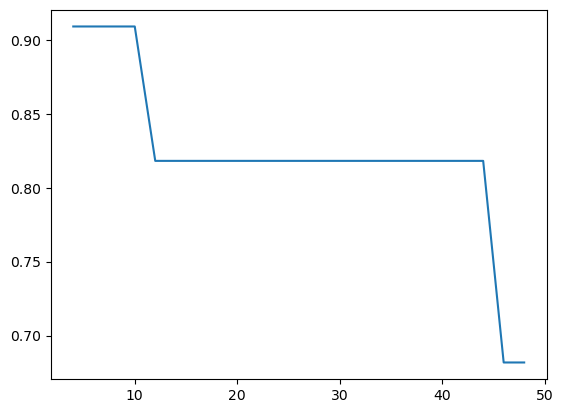

In [126]:
# Split again from the full processed data

# y: target variable is 'window_band'
y = no_outlier["quality_band"]

# Drop target and irrelevant columns from features
x = no_outlier[["monolayer_fraction", "domain_size_um", "defect_density_cm2", "sheet_res_ohm_sq",
    "layer_count_avg"]]  # Correlate most strongly with graphene quality and are ideal for distance-based KNN

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

n = len(no_outlier)  # number of elements (rows) in a dataset without any outliers (input variable)
print(n)
# Assume the value 'k' as the square root of the number of elements (rows) in an array
k = int(round(n)**0.5)
print(k)  # This is NOT the best value of 'k'.

from sklearn.neighbors import KNeighborsClassifier
my_knn = KNeighborsClassifier(8)  # k-value needs to be selected by the user (k = 8).
my_model_1 = my_knn.fit(x_train, y_train)  # Train the model.
print(my_model_1.score(x_train, y_train))

y_pred = my_model_1.predict(x_test)
print(y_pred)

my_model_1.classes_  # The class refers to unique values of the target column in a classification problem.
print(my_model_1.classes_)

my_model_1.n_neighbors
print(my_model_1.n_neighbors)

k2 = int(round(len(x_train)**0.5, 0))  # Initial but NOT final 'k'
print(k2)

# To find the value of 'k', we will create multiple temporary models.
accuracy = []
k_values = np.arange(4, 50, 2)
for my_k2 in k_values:
    temp = KNeighborsClassifier(my_k2)
    temp.fit(x_train, y_train)
    y2_pred = temp.predict(x_test)
    accuracy.append(accuracy_score(y_test, y2_pred))
print(accuracy)
print(k_values)

plt.plot(k_values, accuracy);

# By looking at the above plot, we will finalize the k-value as 7 to get maximum accuracy.
final_model = KNeighborsClassifier(k2)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

# K-Means Clustering

In [173]:
# Target variable: "duration_hours"
# The chosen features form groups that significantly vary in synthesis time, making them the most reliable indicators of how long it generally takes 
# to produce each type of graphene.

In [177]:
# Features: ["monolayer_fraction", "domain_size_um", "defect_density_cm2", "sheet_res_ohm_sq", "layer_count_avg"]
# They together represent the structural and quality aspects of graphene that indicate the duration of the synthesis process.

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

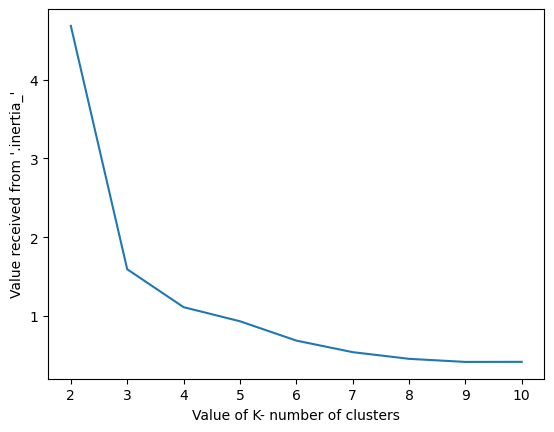

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 60.48
For clusters = 2 , the davies bouldin score is 0.51
For clusters = 2 , the calinski harabasz score is 135.15

For clusters = 3 , the silhouette score is 63.5
For clusters = 3 , the davies bouldin score is 0.49
For clusters = 3 , the calinski harabasz score is 262.61

For clusters = 4 , the silhouette score is 54.54
For clusters = 4 , the davies bouldin score is 0.6
For clusters = 4 , the calinski harabasz score is 217.9

For clusters = 5 , the silhouette score is 54.06
For clusters = 5 , the davies bouldin score is 0.67
For clusters = 5 , the calinski harabasz score is 247.58

For clusters = 6 , the silhouette score is 50.38
For clusters = 6 , the davies bouldin score is 0.72
For clusters = 6 , the calinski harabasz score is 219.5

For clusters = 7 , the silhouette score is 50.29
For clusters = 7 , the davies bouldin score is 0.72
For clusters = 7 , the calinski harabasz score is 220.42

For clusters = 8 , the silhouette score is 43.31
F

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

0.5656023232178169
0.545600529031436
0.4902858531767047


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.448376710211502
0.45639591069790797


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4357503722523988


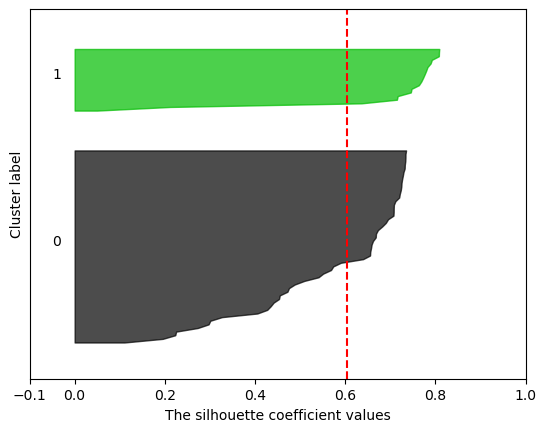

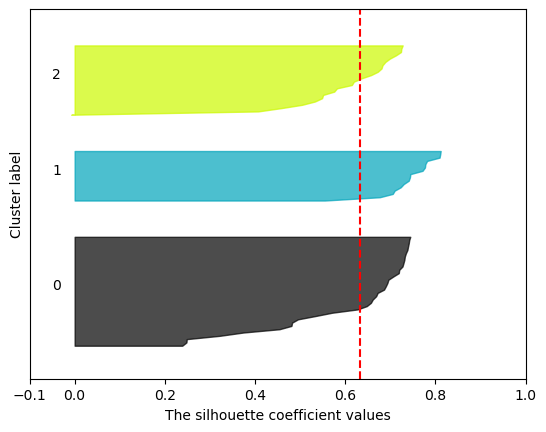

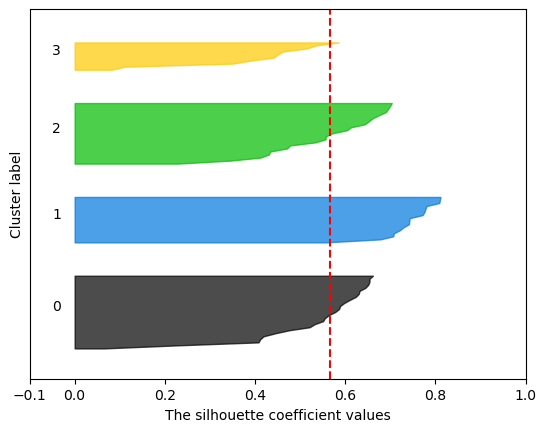

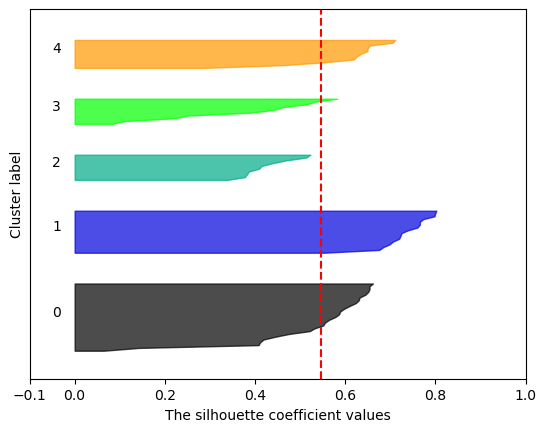

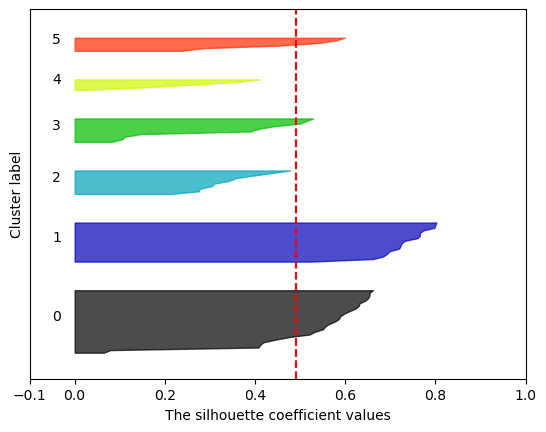

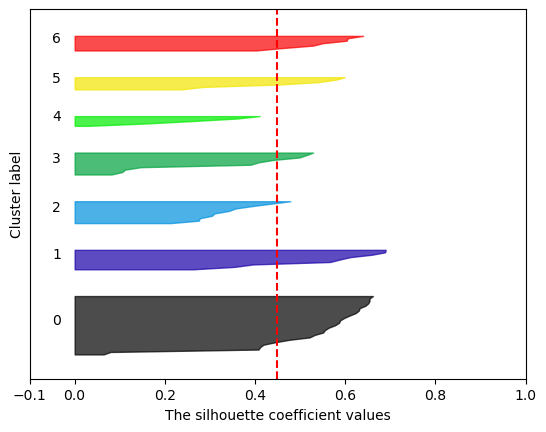

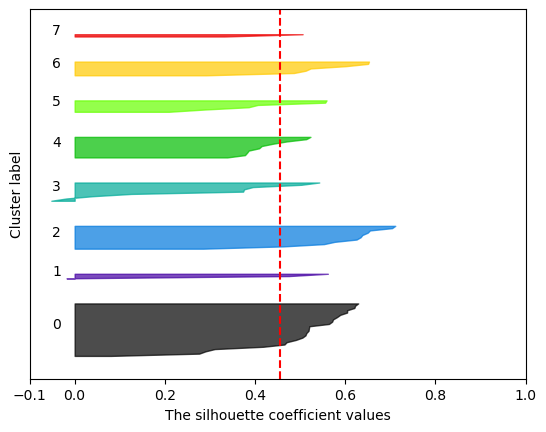

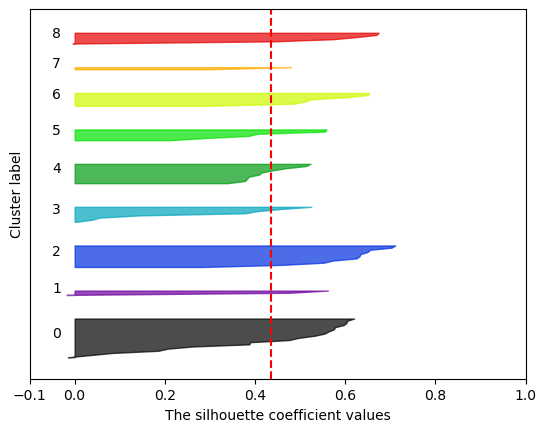

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


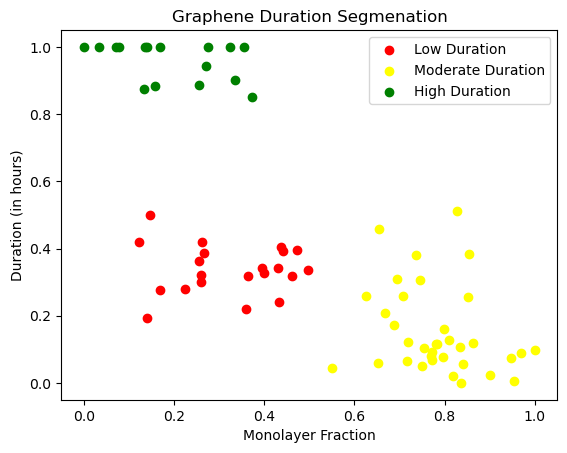

In [155]:
# Tasks 1-2 (Part 1): "monolayer_fraction" vs. "duration_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["monolayer_fraction", "duration_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["monolayer_fraction", "duration_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Duration", "Moderate Duration", "High Duration"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "monolayer_fraction"],
                clustering_data.loc[clustering_data.cluster == i, "duration_hours"],
                c=colors[i], label=segments[i])
plt.title("Graphene Duration Segmenation")
plt.xlabel("Monolayer Fraction")
plt.ylabel("Duration (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

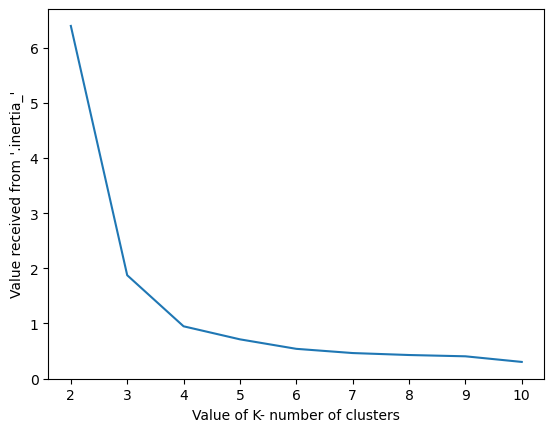

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 58.17
For clusters = 2 , the davies bouldin score is 0.52
For clusters = 2 , the calinski harabasz score is 76.06

For clusters = 3 , the silhouette score is 67.03
For clusters = 3 , the davies bouldin score is 0.47
For clusters = 3 , the calinski harabasz score is 211.01

For clusters = 4 , the silhouette score is 66.88
For clusters = 4 , the davies bouldin score is 0.52
For clusters = 4 , the calinski harabasz score is 293.53

For clusters = 5 , the silhouette score is 65.31
For clusters = 5 , the davies bouldin score is 0.6
For clusters = 5 , the calinski harabasz score is 305.91

For clusters = 6 , the silhouette score is 62.5
For clusters = 6 , the davies bouldin score is 0.69
For clusters = 6 , the calinski harabasz score is 308.82

For clusters = 7 , the silhouette score is 63.52
For clusters = 7 , the davies bouldin score is 0.65
For clusters = 7 , the calinski harabasz score is 326.09

For clusters = 8 , the silhouette score is 61.02


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6702565514673126
0.6749614828576335
0.6383054239701278


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6348493435738575
0.64057488661813
0.6102623112143558


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6111722795415493


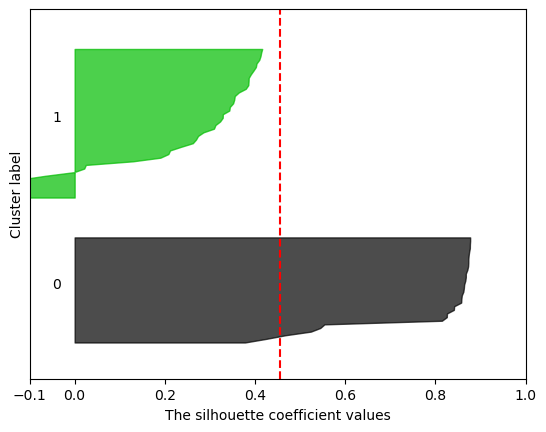

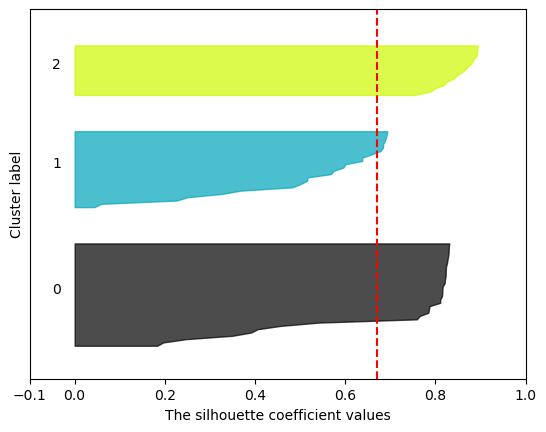

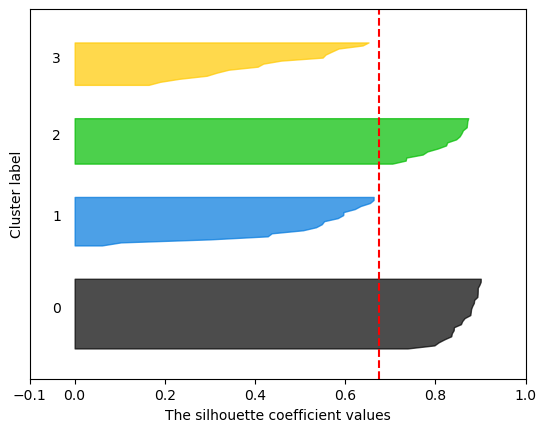

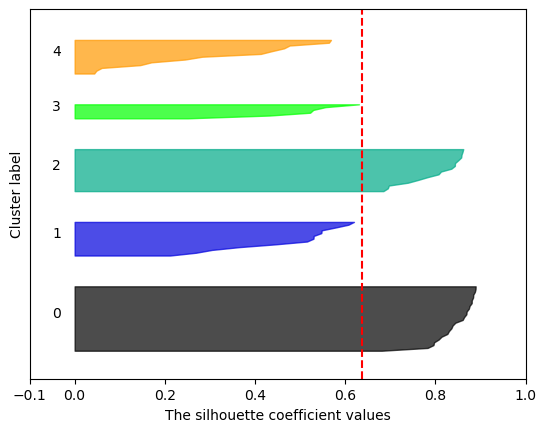

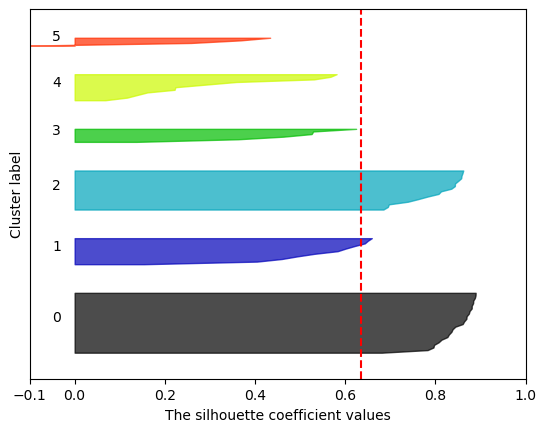

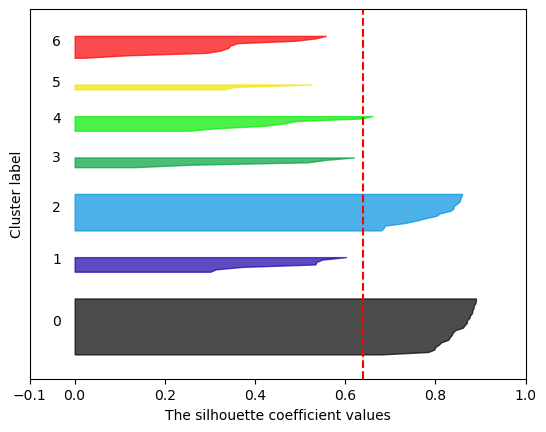

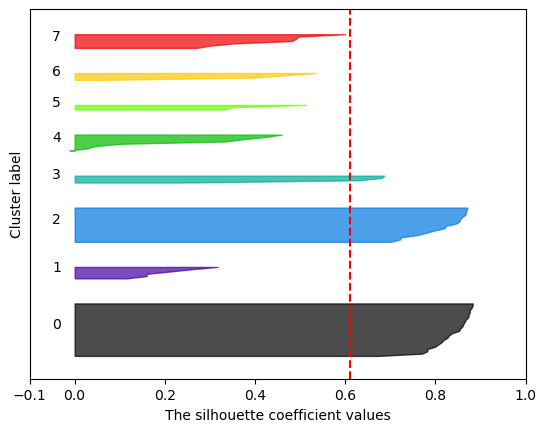

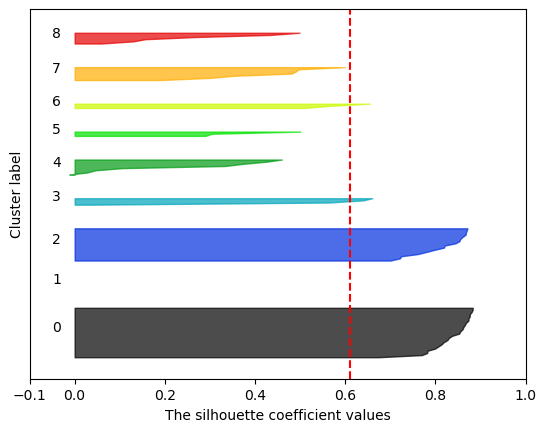

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


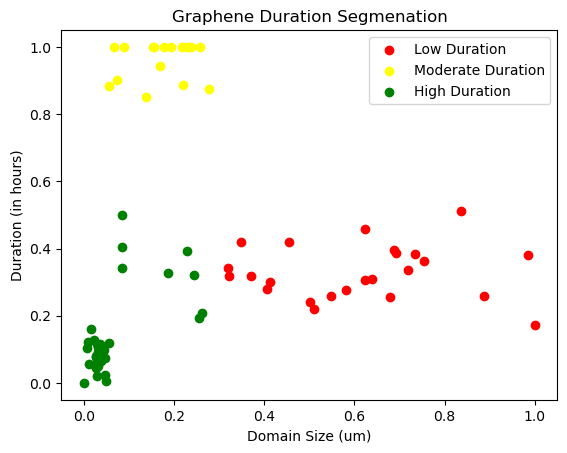

In [153]:
# Tasks 1-2 (Part 2): "domain_size_um" vs. "duration_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["domain_size_um", "duration_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["domain_size_um", "duration_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Duration", "Moderate Duration", "High Duration"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "domain_size_um"],
                clustering_data.loc[clustering_data.cluster == i, "duration_hours"],
                c=colors[i], label=segments[i])
plt.title("Graphene Duration Segmenation")
plt.xlabel("Domain Size (um)")
plt.ylabel("Duration (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

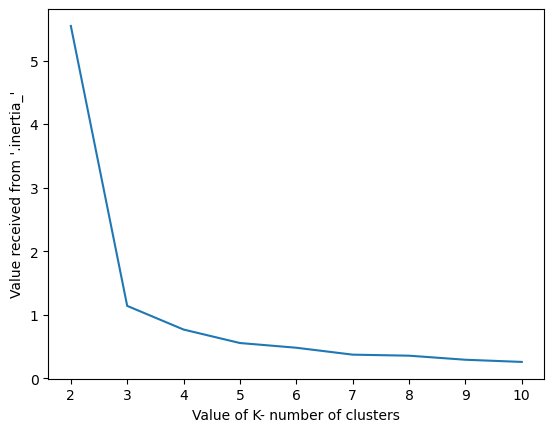

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 62.25
For clusters = 2 , the davies bouldin score is 0.48
For clusters = 2 , the calinski harabasz score is 127.63

For clusters = 3 , the silhouette score is 71.12
For clusters = 3 , the davies bouldin score is 0.38
For clusters = 3 , the calinski harabasz score is 394.83

For clusters = 4 , the silhouette score is 66.25
For clusters = 4 , the davies bouldin score is 0.55
For clusters = 4 , the calinski harabasz score is 395.76

For clusters = 5 , the silhouette score is 58.86
For clusters = 5 , the davies bouldin score is 0.68
For clusters = 5 , the calinski harabasz score is 348.65

For clusters = 6 , the silhouette score is 59.05
For clusters = 6 , the davies bouldin score is 0.63
For clusters = 6 , the calinski harabasz score is 305.86

For clusters = 7 , the silhouette score is 54.67
For clusters = 7 , the davies bouldin score is 0.68
For clusters = 7 , the calinski harabasz score is 397.82

For clusters = 8 , the silhouette score is 49.

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5501476576540669
0.7112388343506263
0.6624922135845629


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.555658609702021
0.5101032415602205
0.5177065453702823
0.5360416467671634


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.507785603330495


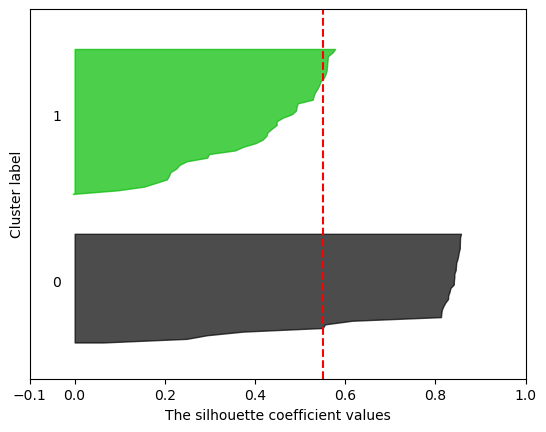

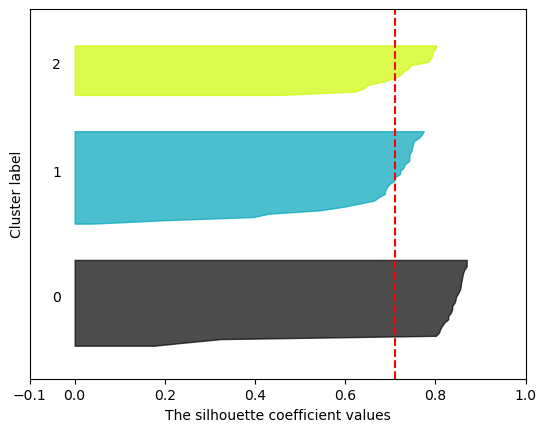

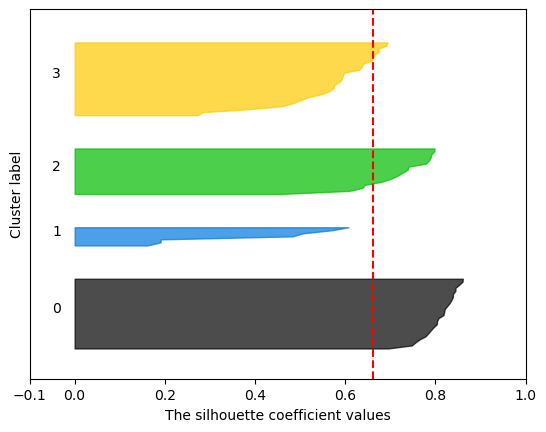

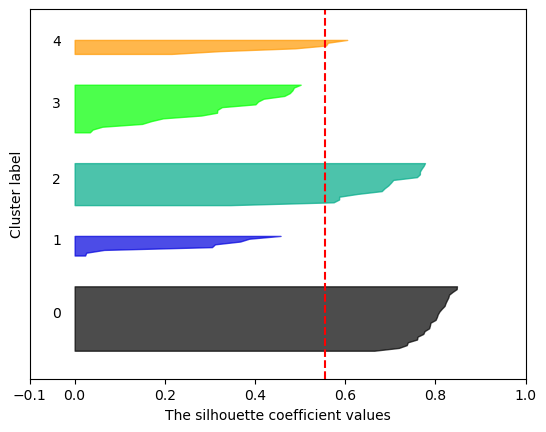

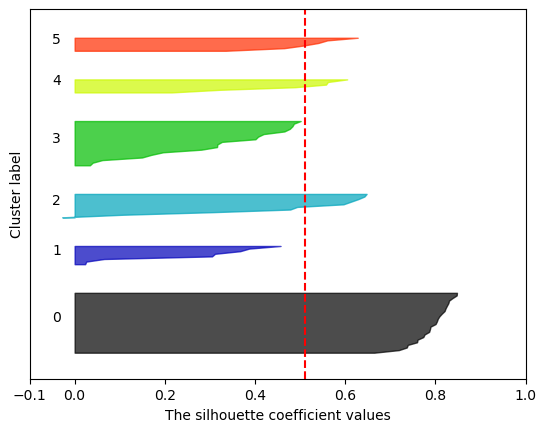

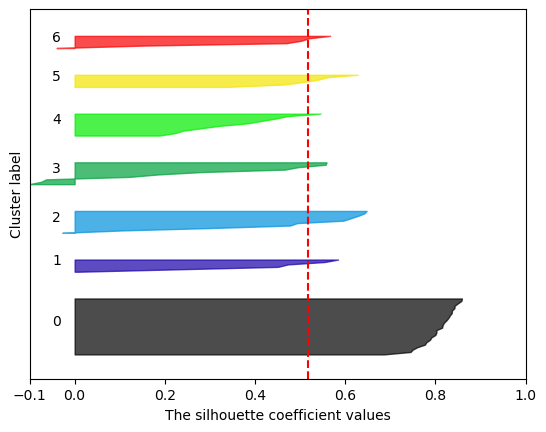

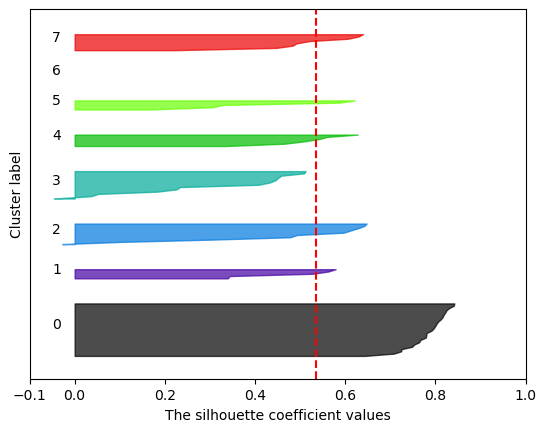

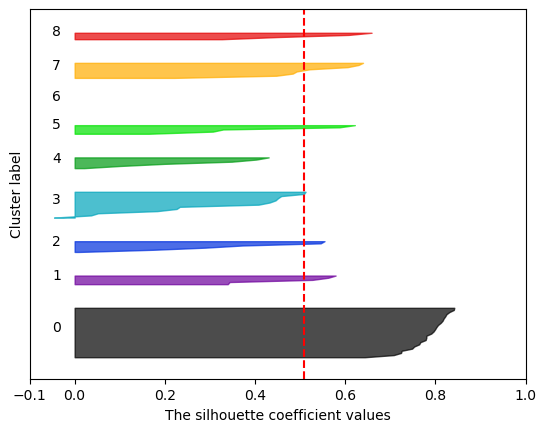

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


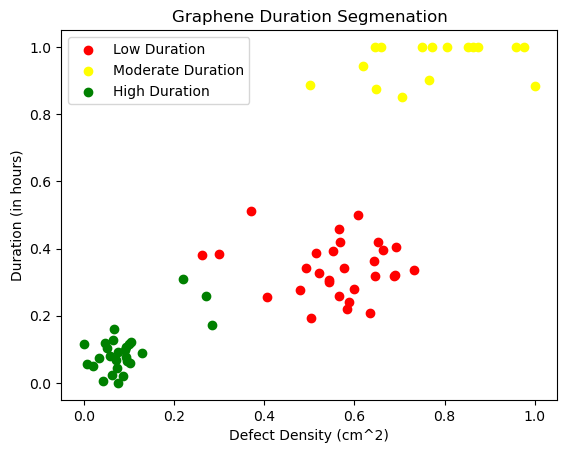

In [151]:
# Tasks 1-2 (Part 3): "defect_density_cm2" vs. "duration_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["defect_density_cm2", "duration_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["defect_density_cm2", "duration_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Duration", "Moderate Duration", "High Duration"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "defect_density_cm2"],
                clustering_data.loc[clustering_data.cluster == i, "duration_hours"],
                c=colors[i], label=segments[i])
plt.title("Graphene Duration Segmenation")
plt.xlabel("Defect Density (cm^2)")
plt.ylabel("Duration (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

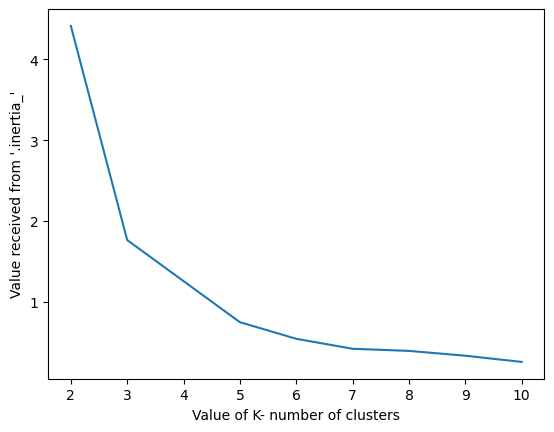

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 62.26
For clusters = 2 , the davies bouldin score is 0.54
For clusters = 2 , the calinski harabasz score is 137.57

For clusters = 3 , the silhouette score is 62.23
For clusters = 3 , the davies bouldin score is 0.51
For clusters = 3 , the calinski harabasz score is 224.18

For clusters = 4 , the silhouette score is 57.9
For clusters = 4 , the davies bouldin score is 0.62
For clusters = 4 , the calinski harabasz score is 209.06

For clusters = 5 , the silhouette score is 58.3
For clusters = 5 , the davies bouldin score is 0.64
For clusters = 5 , the calinski harabasz score is 188.28

For clusters = 6 , the silhouette score is 56.73
For clusters = 6 , the davies bouldin score is 0.66
For clusters = 6 , the calinski harabasz score is 294.99

For clusters = 7 , the silhouette score is 57.91
For clusters = 7 , the davies bouldin score is 0.62
For clusters = 7 , the calinski harabasz score is 330.16

For clusters = 8 , the silhouette score is 44.57

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6226096538826327
0.6194375022267149
0.6110927128808165


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5956601539657121
0.5814896585466536
0.571877017447154
0.5643668215288243


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.568644002632487


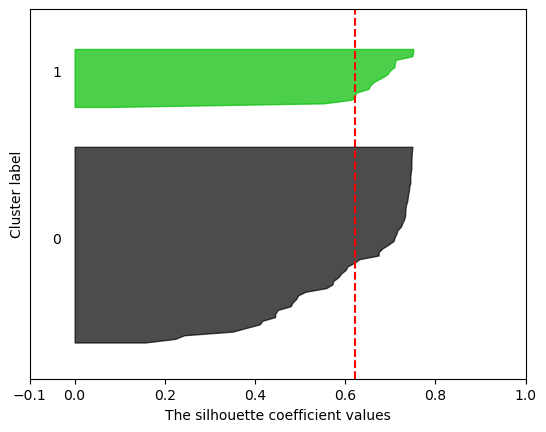

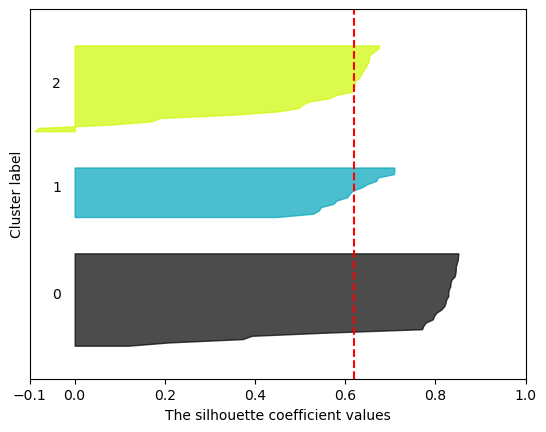

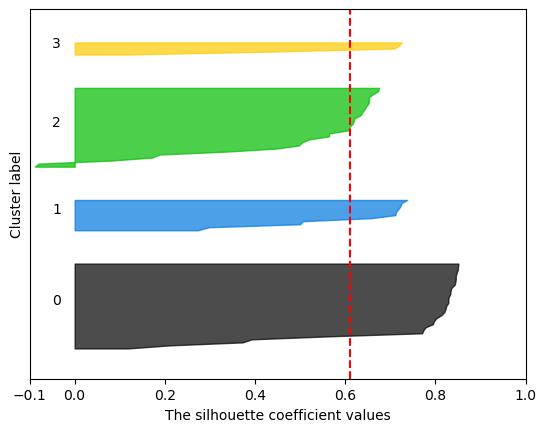

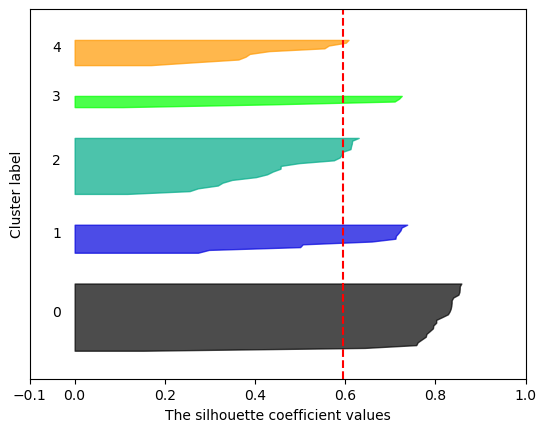

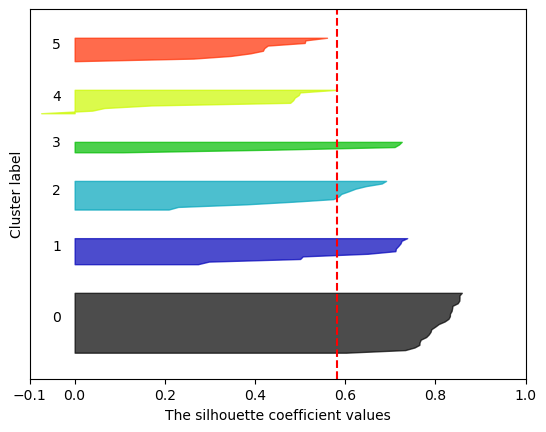

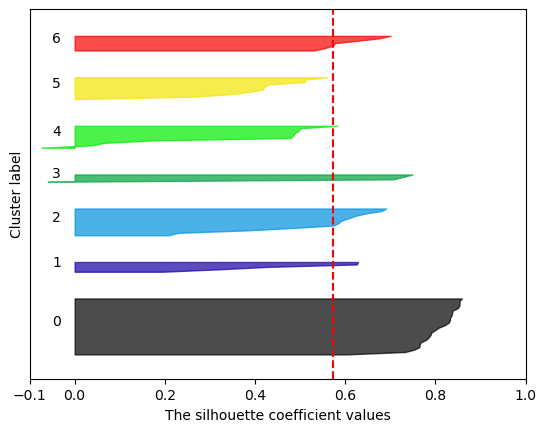

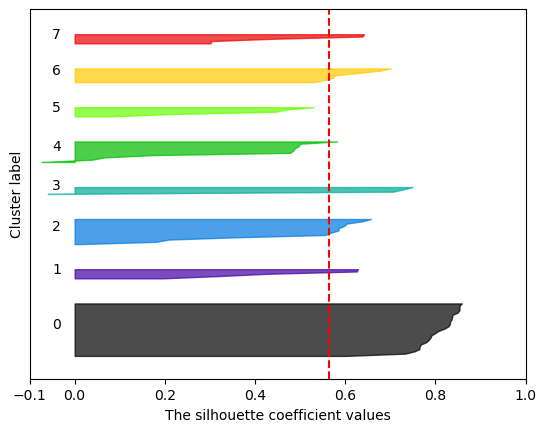

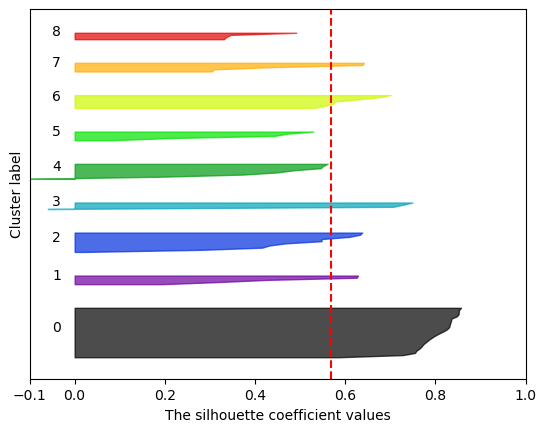

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


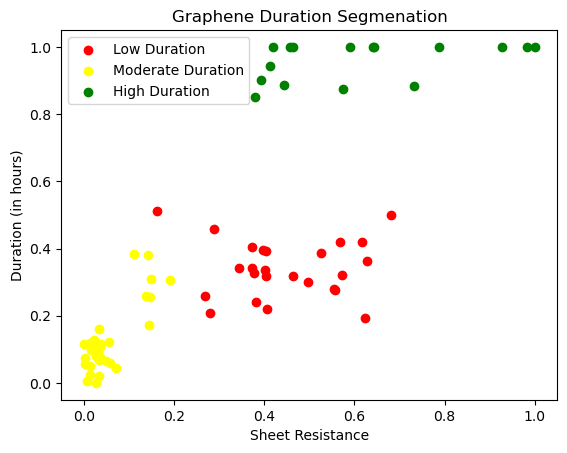

In [157]:
# Tasks 1-2 (Part 4): "sheet_res_ohm_sq" vs. "duration_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["sheet_res_ohm_sq", "duration_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["sheet_res_ohm_sq", "duration_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Duration", "Moderate Duration", "High Duration"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "sheet_res_ohm_sq"],
                clustering_data.loc[clustering_data.cluster == i, "duration_hours"],
                c=colors[i], label=segments[i])
plt.title("Graphene Duration Segmenation")
plt.xlabel("Sheet Resistance")
plt.ylabel("Duration (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

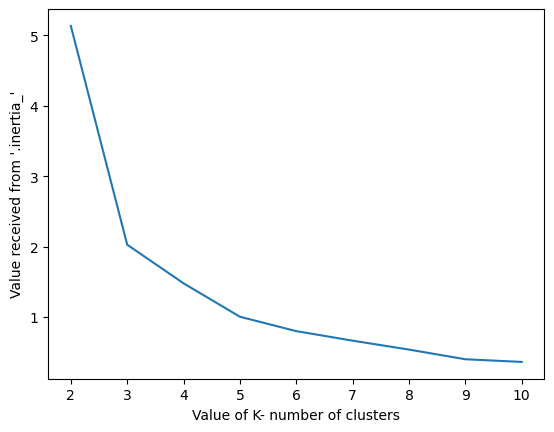

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 55.19
For clusters = 2 , the davies bouldin score is 0.7
For clusters = 2 , the calinski harabasz score is 120.99

For clusters = 3 , the silhouette score is 60.89
For clusters = 3 , the davies bouldin score is 0.54
For clusters = 3 , the calinski harabasz score is 203.77

For clusters = 4 , the silhouette score is 61.07
For clusters = 4 , the davies bouldin score is 0.49
For clusters = 4 , the calinski harabasz score is 182.02

For clusters = 5 , the silhouette score is 56.12
For clusters = 5 , the davies bouldin score is 0.62
For clusters = 5 , the calinski harabasz score is 217.58

For clusters = 6 , the silhouette score is 52.38
For clusters = 6 , the davies bouldin score is 0.66
For clusters = 6 , the calinski harabasz score is 225.78

For clusters = 7 , the silhouette score is 52.53
For clusters = 7 , the davies bouldin score is 0.63
For clusters = 7 , the calinski harabasz score is 229.7

For clusters = 8 , the silhouette score is 53.31

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5102977651760706
0.6052621144558419
0.5466423304116089


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5261083896972604
0.5434317751020422
0.5438819499174954


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.41888696944951154
0.4389040324462057


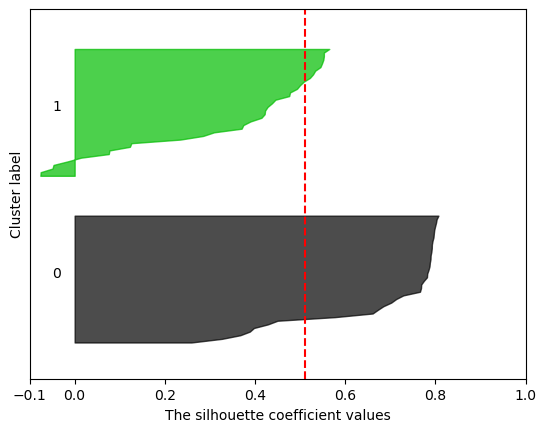

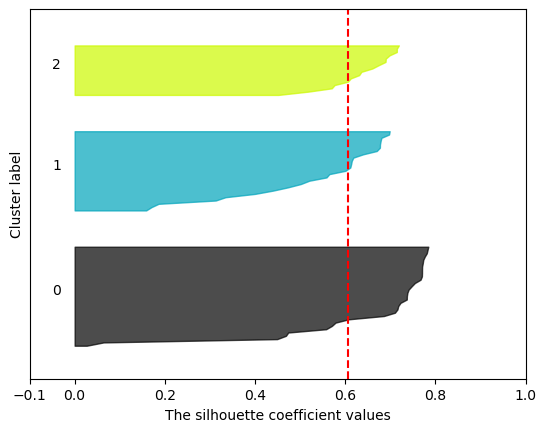

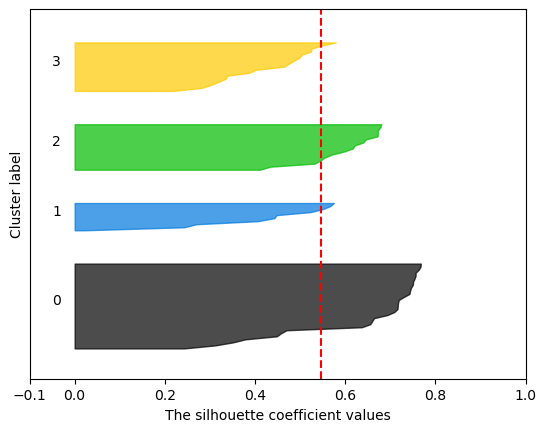

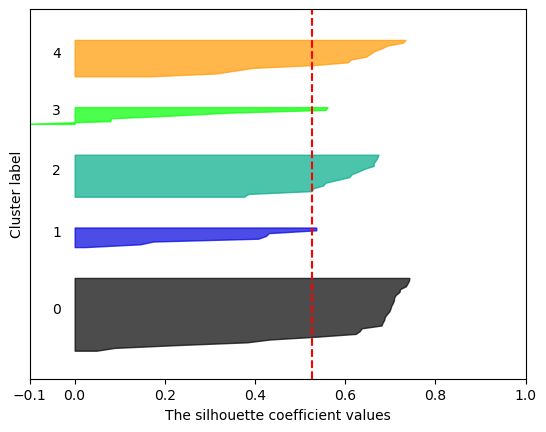

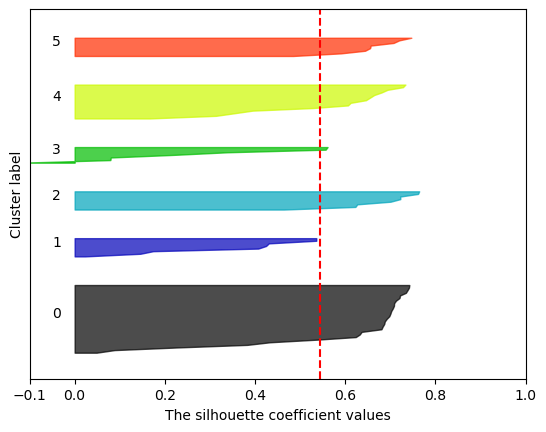

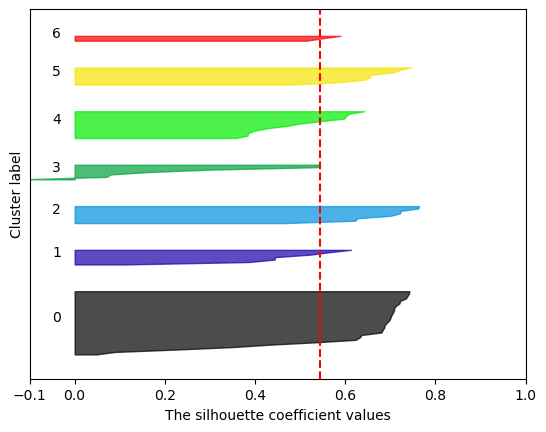

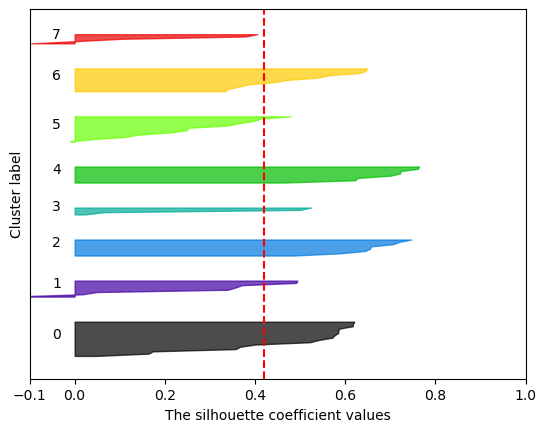

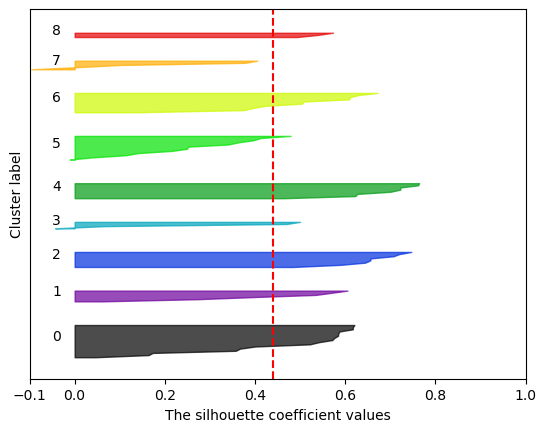

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


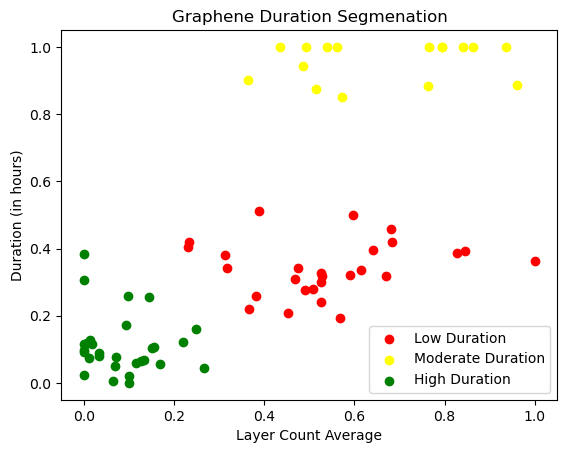

In [161]:
# Tasks 1-2 (Part 5): "layer_count_avg" vs. "duration_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["layer_count_avg", "duration_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["layer_count_avg", "duration_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Duration", "Moderate Duration", "High Duration"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "layer_count_avg"],
                clustering_data.loc[clustering_data.cluster == i, "duration_hours"],
                c=colors[i], label=segments[i])
plt.title("Graphene Duration Segmenation")
plt.xlabel("Layer Count Average")
plt.ylabel("Duration (in hours)")
plt.legend()
plt.show()